#Correlação:
 Identifica a força da relação linear entre as variáveis numéricas.
#Clusterização:
Agrupa os clientes em categorias semelhantes com base em características numéricas.
#Análise Fatorial (PCA):
 Reduz a dimensionalidade dos dados e permite a visualização dos principais fatores subjacentes, além de agrupar os dados por similaridade.

In [15]:
# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o dataset
# Substitua 'seu_arquivo.csv' pelo nome do arquivo que você deseja analisar
df = pd.read_csv('meu_arquivo.csv')
df.head()

,ID,Idade,Salario_Anual,Genero,Ocupacao,Numero_Contas,Cidade,Score_Credito
0,1,34,45000,Feminino,Engenheira,2,São Paulo,720
1,2,45,55000,Masculino,Professor,3,Rio de Janeiro,680
2,3,23,32000,Feminino,Designer,1,São Paulo,600
3,4,52,76000,Masculino,Medico,5,Belo Horizonte,790
4,5,29,50000,Feminino,Advogada,3,Curitiba,700


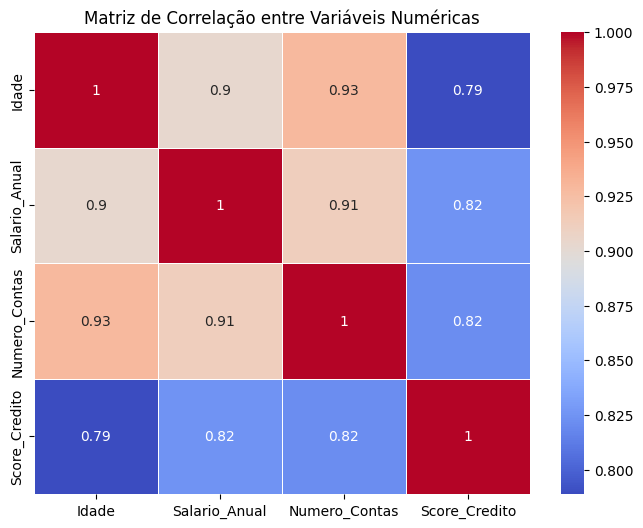

In [16]:
# Matriz de correlação
corr_matrix = df[['Idade', 'Salario_Anual', 'Numero_Contas', 'Score_Credito']].corr()

# Plotando a matriz de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


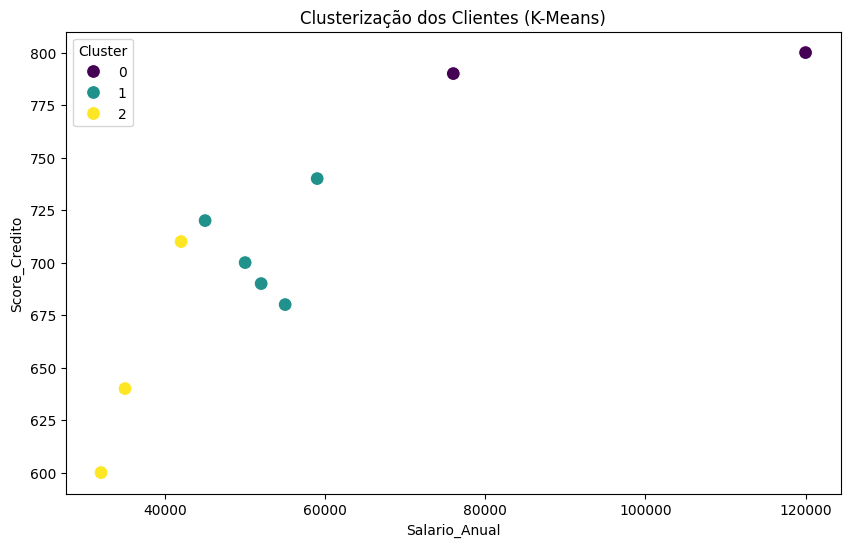

In [17]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Padronizar os dados numéricos para K-Means
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Idade', 'Salario_Anual', 'Numero_Contas', 'Score_Credito']])

# Aplicar K-Means
kmeans = KMeans(n_clusters=3, random_state=0)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualizar os clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Salario_Anual', y='Score_Credito', hue='Cluster', data=df, palette='viridis', s=100)
plt.title('Clusterização dos Clientes (K-Means)')
plt.show()

In [18]:
print (df[['Idade', 'Salario_Anual', 'Numero_Contas', 'Score_Credito']])

   Idade  Salario_Anual  Numero_Contas  Score_Credito
0     34          45000              2            720
1     45          55000              3            680
2     23          32000              1            600
3     52          76000              5            790
4     29          50000              3            700
5     41          59000              4            740
6     33          35000              2            640
7     27          42000              1            710
8     60         120000              6            800
9     38          52000              3            690


In [19]:
print (df_scaled)

[[-0.3825143  -0.47803461 -0.64549722  0.22357373]
 [ 0.61930886 -0.06593581  0.         -0.46434543]
 [-1.38433745 -1.01376304 -1.29099445 -1.84018375]
 [ 1.25683269  0.79947167  1.29099445  1.42743226]
 [-0.83788846 -0.27198521  0.         -0.12038585]
 [ 0.25500953  0.09890371  0.64549722  0.56753331]
 [-0.47358913 -0.8901334  -0.64549722 -1.15226459]
 [-1.02003812 -0.60166425 -1.29099445  0.05159394]
 [ 1.98543134  2.61270638  1.93649167  1.59941205]
 [-0.01821497 -0.18956545  0.         -0.29236564]]


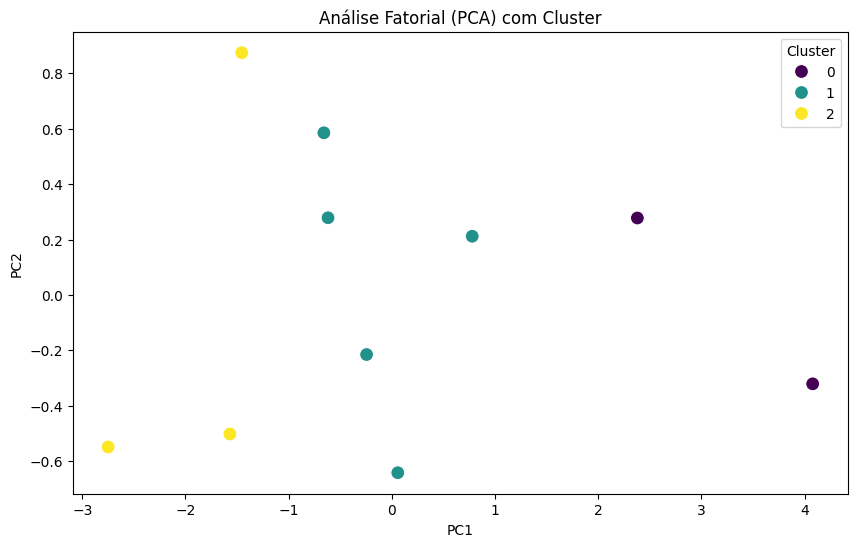

Variância explicada pelo PC1: 0.90
Variância explicada pelo PC2: 0.06


In [20]:
from sklearn.decomposition import PCA

# Aplicar PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Explicar variância
explained_variance = pca.explained_variance_ratio_

# Adicionar os componentes principais ao DataFrame
df['PC1'] = df_pca[:, 0]
df['PC2'] = df_pca[:, 1]

# Visualizar os componentes principais
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df, palette='viridis', s=100)
plt.title('Análise Fatorial (PCA) com Cluster')
plt.show()

# Exibir a variância explicada
print(f'Variância explicada pelo PC1: {explained_variance[0]:.2f}')
print(f'Variância explicada pelo PC2: {explained_variance[1]:.2f}')

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder


In [22]:
# Codificar as variáveis categóricas
le = LabelEncoder()
df['Genero'] = le.fit_transform(df['Genero'])  # Feminino = 0, Masculino = 1
df['Ocupacao'] = le.fit_transform(df['Ocupacao'])
df['Cidade'] = le.fit_transform(df['Cidade'])

# Criando uma variável de classificação binária: Score_Credito > 700 é 1, <= 700 é 0
df['Alto_Score'] = (df['Score_Credito'] > 700).astype(int)

# Visualizando os dados pré-processados
print(df.head())


   ID  Idade  Salario_Anual  Genero  Ocupacao  Numero_Contas  Cidade  \
0   1     34          45000       0         3              2       4   
1   2     45          55000       1         8              3       3   
2   3     23          32000       0         2              1       4   
3   4     52          76000       1         7              5       0   
4   5     29          50000       0         0              3       1   

   Score_Credito  Cluster       PC1       PC2  Alto_Score  
0            720        1 -0.658483  0.585390           1  
1            680        1  0.057740 -0.641693           0  
2            600        2 -2.749394 -0.548792           0  
3            790        0  2.379545  0.277777           1  
4            700        1 -0.618265  0.278649           0  


In [23]:
# Variáveis independentes (X) e a variável dependente (y)
X = df[['Idade', 'Salario_Anual', 'Genero', 'Ocupacao', 'Numero_Contas']]
y = df['Alto_Score']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [24]:
# Instanciar e treinar o modelo de Regressão Logística
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [25]:
# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)


In [26]:
# Avaliar a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy * 100:.2f}%')

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
print('Matriz de Confusão:\n', cm)

# Relatório de classificação
print('Relatório de Classificação:\n', classification_report(y_test, y_pred))


Acurácia: 66.67%
Matriz de Confusão:
 [[1 0]
 [1 1]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Codificar as variáveis categóricas
le = LabelEncoder()
df['Genero'] = le.fit_transform(df['Genero'])  # Feminino = 0, Masculino = 1
df['Ocupacao'] = le.fit_transform(df['Ocupacao'])
df['Cidade'] = le.fit_transform(df['Cidade'])

# Criando a variável de classificação binária: Score_Credito > 700 é 1, <= 700 é 0
df['Alto_Score'] = (df['Score_Credito'] > 700).astype(int)

# Visualizando os dados pré-processados
print(df.head())


# Variáveis independentes (X) e a variável dependente (y)
X = df[['Idade', 'Salario_Anual', 'Genero', 'Ocupacao', 'Numero_Contas', 'Cidade']]
y = df['Alto_Score']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Instanciar o classificador KNN
knn = KNeighborsClassifier(n_neighbors=3)

# Treinar o modelo com os dados de treino
knn.fit(X_train, y_train)


# Fazer previsões no conjunto de teste
y_pred = knn.predict(X_test)


# Avaliar a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy * 100:.2f}%')

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
print('Matriz de Confusão:\n', cm)

# Relatório de classificação
print('Relatório de Classificação:\n', classification_report(y_test, y_pred))

   ID  Idade  Salario_Anual  Genero  Ocupacao  Numero_Contas  Cidade  \
0   1     34          45000       0         3              2       4   
1   2     45          55000       1         8              3       3   
2   3     23          32000       0         2              1       4   
3   4     52          76000       1         7              5       0   
4   5     29          50000       0         0              3       1   

   Score_Credito  Cluster       PC1       PC2  Alto_Score  
0            720        1 -0.658483  0.585390           1  
1            680        1  0.057740 -0.641693           0  
2            600        2 -2.749394 -0.548792           0  
3            790        0  2.379545  0.277777           1  
4            700        1 -0.618265  0.278649           0  
Acurácia: 33.33%
Matriz de Confusão:
 [[1 0]
 [2 0]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
